In [1]:
import pandas as pd
import numpy as np

#matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import datetime as dt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc

### Inspection and data probing

In [2]:
#The first step is to first create an engine for sqlalchemy
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)


# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# view all of the classes that automap found
Base.classes.keys()

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
newest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
mostrecent = dt.datetime.strptime(newest[0],'%Y-%m-%d').date()
mostrecent

datetime.date(2017, 8, 23)

In [5]:
# Calculate the date 1 year ago from the last data point in the database
yearprevious = mostrecent - dt.timedelta(365)
yearprevious=yearprevious.strftime('%Y-%m-%d')
yearprevious





'2016-08-23'

# Precipitation SQL to DF

In [6]:
# Perform a query to retrieve the data and precipitation scores
prec_data = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= yearprevious).\
                    order_by(Measurement.date).\
                    all()
prec_data



[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [14]:

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(prec_data)
# Sort the dataframe by date
prec_df.set_index('date')
prec_df.sort_index(inplace=True)

prec_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


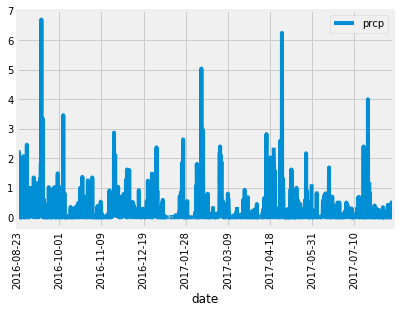

In [9]:
# Use Pandas Plotting with Matplotlib to plot the data
prec_plot = prec_df.plot(x='date', rot=90, grid=True)
prec_plot

In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prec_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station  SQL to DF

In [11]:
# Design a query to show how many stations are available in this dataset?

session.query(Station).count()

9

In [66]:
# What are the most active stations? (i.e. what stations have the most rows)?

# List the stations and the counts in descending order.
station_data = session.query(Measurement.station, func.count(Measurement.tobs).label('total_observations')).\
            group_by(Measurement.station).\
            order_by(desc('total_observations')).all()
station_data

#'USC00519281' has the most reports, with 2772 total

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [82]:
station_activity_df=  pd.DataFrame(station_data)
mostactivestation = station_activity_df.station[0]

In [83]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
usc_281 =session.query(Measurement.tobs)\
         .filter(Measurement.station ==mostactivestation)\
         .order_by(desc(Measurement.prcp)).all()
highest=usc_281[0]
lowest=usc_281[len(usc_281)-1]
average=np.average(usc_281)

highest, lowest, average

((78.0), (77.0), 71.66378066378067)

In [84]:
usc_281[1]

(68.0)

In [85]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temps = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.date >= yearprevious, Measurement.station == mostactivestation).\
                    order_by(Measurement.date).\
                    all()
station_temps

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [86]:
stat_temps_df = pd.DataFrame(station_temps)
stat_temps_df.set_index('date')
stat_temps_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
5,2016-08-28,73.0
6,2016-08-29,78.0
7,2016-08-30,77.0
8,2016-08-31,78.0
9,2016-09-01,80.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFB434B550>]],
      dtype=object)

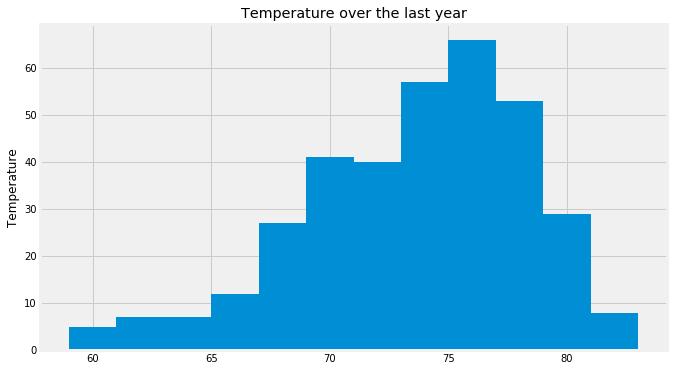

In [98]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


temperature_plot = stat_temps_df.hist(column='tobs', grid=True, figsize=(10,6), bins=12)
subplots= temperature_plot[0][0]
subplots.set_title("Temperatures over the last year")
subplots.set_ylabel("Temperature")
temperature_plot